In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #helps split data evenly and randomly
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
sb.set()

pd.options.display.max_rows = 999



In [2]:
life_transform = pd.read_csv("dataset/life_transform.csv")
life_transform.drop(columns=life_transform.columns[0],axis=1,inplace=True)
print("Data dimensions", life_transform.shape)
life_transform.head()

Data dimensions (2938, 21)


,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,1,2015.0,0.294686,0.802268,0.606280,-1.540089,-0.653537,0.317298,0.806913,...,0.616162,0.006410,0.562634,0.171717,0.0,-0.765913,0.695802,1.863475,0.215278,10.1
1,Afghanistan,1,2014.0,0.187396,0.813152,0.611111,-1.540089,-0.641558,0.293245,0.766886,...,0.621212,0.127778,0.567017,0.156566,0.0,-0.745047,-0.642920,1.881842,0.211111,10.0
2,Afghanistan,1,2013.0,0.187396,0.809070,0.615942,-1.540089,-0.643161,0.309280,0.749863,...,0.626263,0.150000,0.556038,0.166667,0.0,-0.731598,0.674292,1.896363,0.202778,9.9
3,Afghanistan,1,2012.0,0.180763,0.814512,0.623188,-1.540089,-0.617785,0.333333,0.883365,...,0.632997,0.177778,0.639925,0.181818,0.0,-0.705787,-0.011252,1.914304,0.193056,9.8
4,Afghanistan,1,2011.0,0.175788,0.818594,0.628019,-1.540089,-1.506529,0.340278,0.888946,...,0.639731,0.183333,0.497836,0.186869,0.0,-1.725140,-0.073218,1.932018,0.180556,9.5


*Updated descriptions of dataset*
>**1) Country**: Country <br>
>**2) Year**: Year in which the data is collected, ranges from `2000` to `2015`. A total of `16` years per country <br>
>**3) Status**: Whether country is developing or developed <br>
>**4) Life expectancy**: Life expectancy in age <br>
>**5) Adult Mortality**: ~Probability of dying Number~ Percentage of deaths between `15` and `60` years ~per `1000` population~. Both male and female. `(%)` <br>
>**6) Infant deaths**: ~Number~ Percentage of Infant Deaths ~per `1000` population~ `(%)` <br>
>**7) Alcohol**: Alcohol consumption (in litres of pure alcohol), per capita (15+) <br>
>**8) Percentage Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita`(%)` <br>
>**9) Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds `(%)` <br>
>**10) Measles**: Measles - ~number~ Percentage of reported cases in population `(%)` ~per `1000` population~ <br>
>**11) BMI**: Average Body Mass Index of entire population <br>
>**12) under-five-deaths**: ~Number~ Percentage of under-five deaths in population ~per `1000` population~ `(%)`<br>
>**13) Polio**: Polio (Pol3) immunization coverage among 1-year-olds `(%)` <br>
>**14) Total expenditure**: General government expenditure on health as a percentage of total government expenditure `(%)` <br>
>**15) Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds `(%)` <br>
>**16) HIV/AIDS**: Percentage of live births who died from HIV/AIDS (0-4 years)`(%)` <br>
>**17) GDP**:Gross Domestic Product per capita (in USD) <br>
>**18) Population**: Population <br>
>**19) Thinness 5-19 years**: Prevalence of thinness among children and adolescents for Age `5` to `19` `(%)` <br>
>**20) Income composition**:Human Development Index in terms of income composition of resources (index ranging from `0` to `1`) <br>
>**21) Schooling**: Number of years of Schooling(years) <br>

In [3]:
life_transform.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   COUNTRY                          2938 non-null   object 
 1   STATUS                           2938 non-null   int64  
 2   YEAR                             2938 non-null   float64
 3   LIFE_EXPECTANCY                  2938 non-null   float64
 4   ADULT_MORTALITY                  2938 non-null   float64
 5   INFANT_DEATHS                    2938 non-null   float64
 6   ALCOHOL                          2938 non-null   float64
 7   PERCENTAGE_EXPENDITURE           2938 non-null   float64
 8   HEPATITIS_B                      2938 non-null   float64
 9   MEASLES                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  UNDER_FIVE_DEATHS                2938 non-null   float64
 12  POLIO               

In [4]:
# lifeEx = lifeEx.drop(['Unnamed: 0'],axis=1)
# lifeEx = lifeEx.drop(['COUNTRY'],axis=1)
# lifeEx = lifeEx.drop(['STATUS'],axis=1)

life_transform.describe()


,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2.938000e+03,2.938000e+03,2.938000e+03,2938.000000,2938.000000
mean,0.825732,2007.518720,0.501309,0.497070,0.498657,-1.876572e-16,-7.742842e-17,0.506461,0.431738,38.790629,0.484631,0.509762,4.402348e-17,0.505652,0.308969,-4.586755e-16,1.053540e-16,-2.648966e-16,0.498775,12.340658
std,0.379405,4.613841,0.278344,0.280640,0.272273,1.000170e+00,1.000170e+00,0.295571,0.340305,20.485912,0.295749,0.302967,1.000170e+00,0.298637,0.389081,1.000170e+00,1.000170e+00,1.000170e+00,0.284977,3.649192
min,0.000000,2000.000000,0.000000,0.000000,0.000000,-1.540089e+00,-2.312958e+00,0.000000,0.000000,1.000000,0.000000,0.000000,-3.762931e+00,0.000000,0.000000,-3.073607e+00,-2.426608e+00,-2.172591e+00,0.000000,0.000000
25%,1.000000,2004.000000,0.249396,0.253333,0.244444,-8.247969e-01,-7.858454e-01,0.245138,0.000000,19.400000,0.230769,0.244444,-5.484182e-01,0.255556,0.000000,-7.687574e-01,-6.717270e-01,-7.715521e-01,0.242630,10.300000
50%,1.000000,2008.000000,0.522222,0.495726,0.489899,1.080217e-01,-6.462024e-02,0.500000,0.487179,43.900000,0.500000,0.518519,-2.295318e-03,0.518519,0.000000,-2.444449e-02,-8.349672e-02,-2.535882e-02,0.508547,12.500000
75%,1.000000,2012.000000,0.742690,0.744048,0.766700,7.882520e-01,9.911980e-01,0.777778,0.730711,56.400000,0.767688,0.777778,5.692044e-01,0.777778,0.736111,8.016743e-01,6.764212e-01,8.014589e-01,0.748889,14.600000
max,1.000000,2015.000000,1.000000,1.000000,1.000000,2.393661e+00,1.623804e+00,1.000000,1.000000,116.135422,1.000000,1.000000,2.871616e+00,1.000000,1.000000,1.746533e+00,2.210668e+00,2.500756e+00,1.000000,26.135726


# Basic correlation exploration

We start by oberserving some relationships between various features and our **response variable, `LIFE_EXPECTANCY`**. We will do so through heatmaps first.

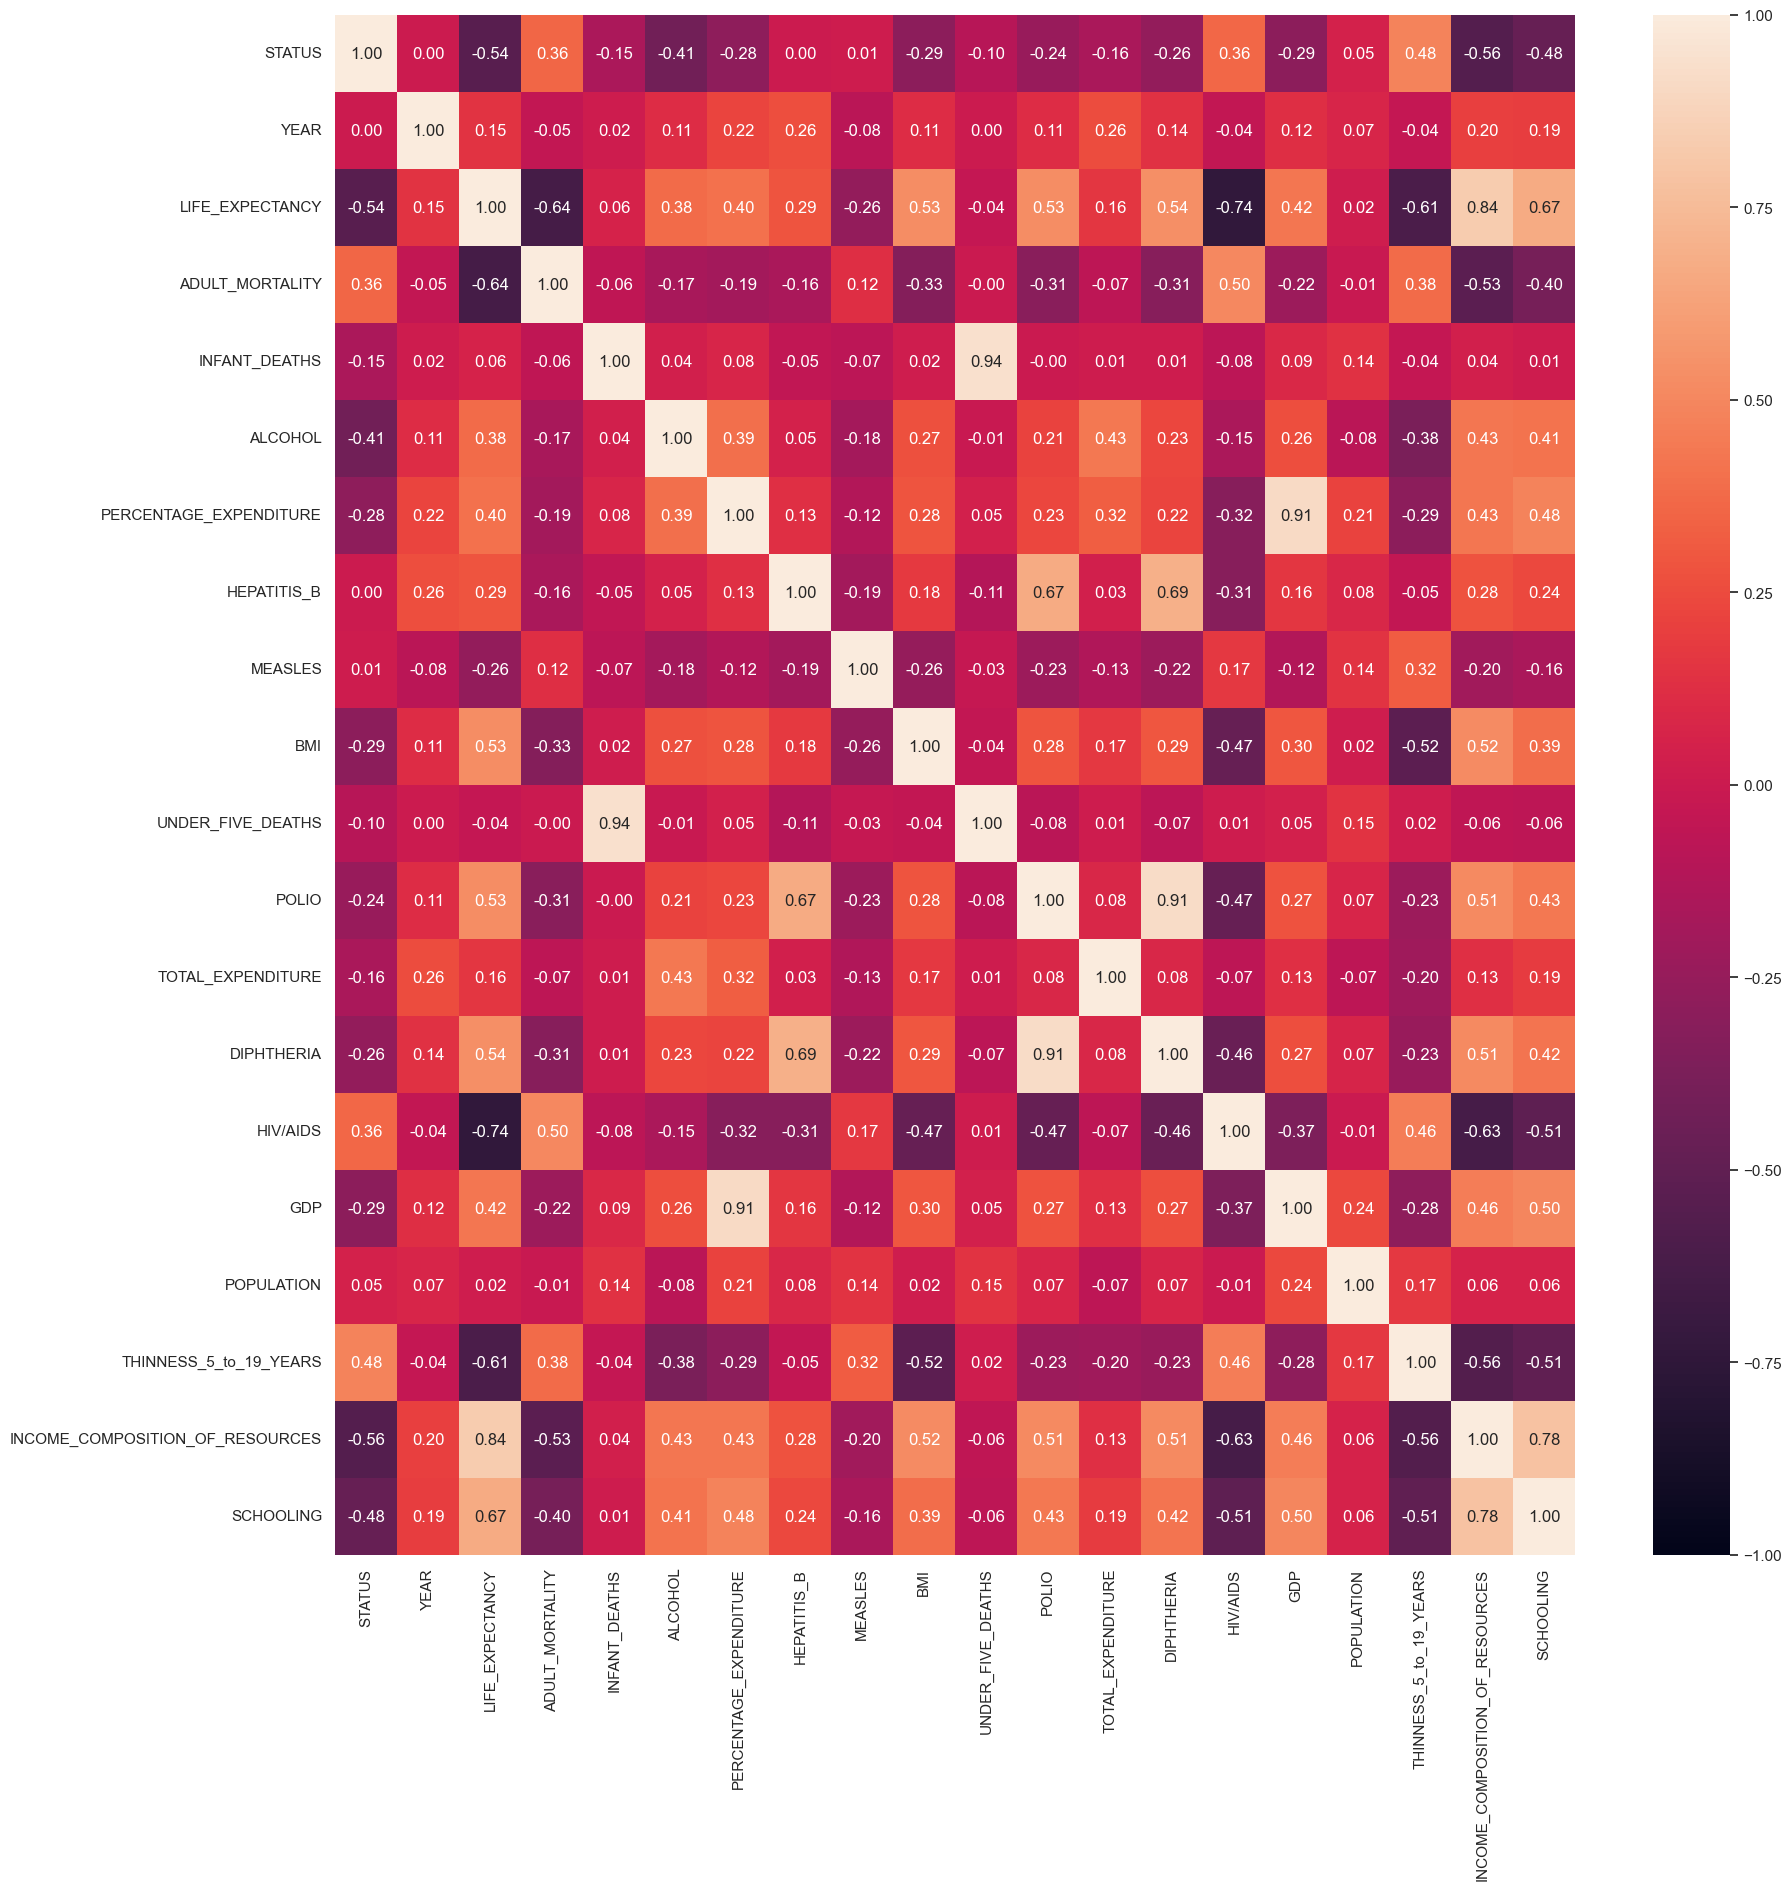

In [5]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(life_transform.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()

Text(0.5, 1.0, 'Features Correlating with Life Expectancy')

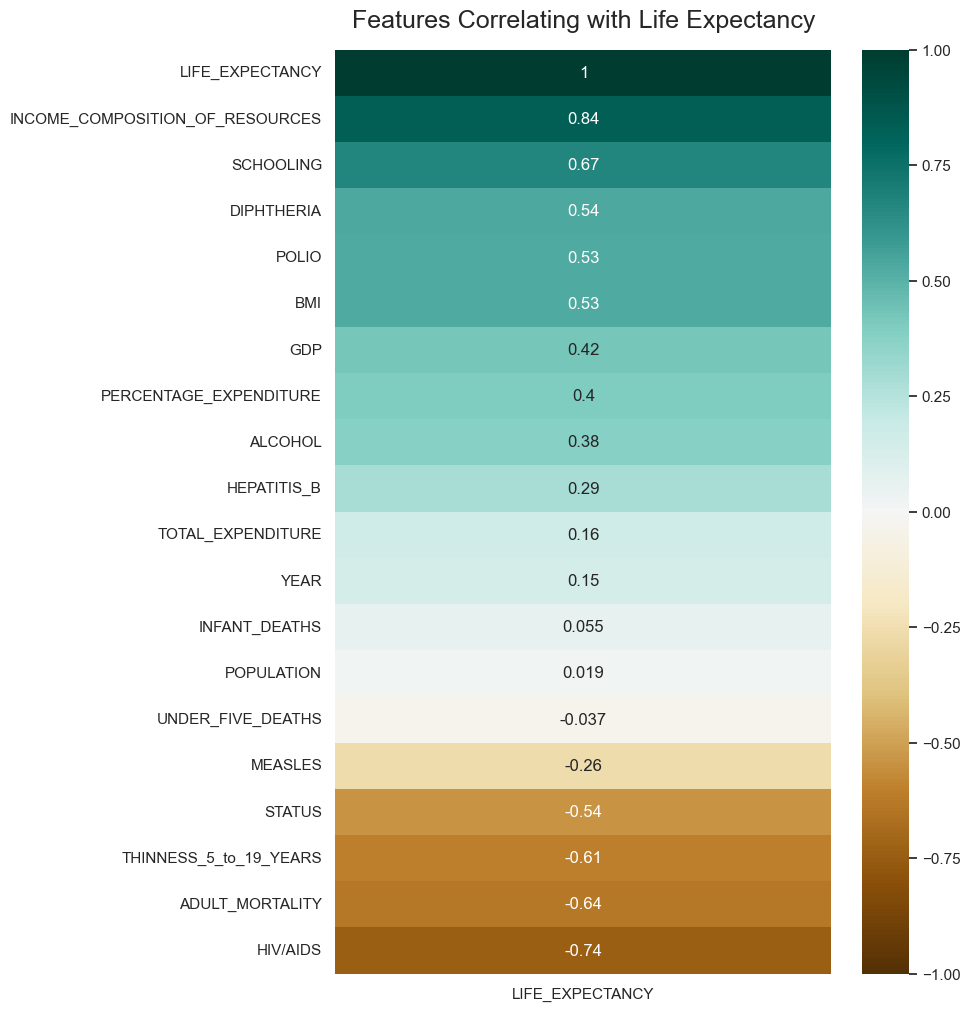

In [6]:
f=plt.figure(figsize=(8, 12))
heatmap = sb.heatmap(life_transform.corr()[['LIFE_EXPECTANCY']].sort_values(by='LIFE_EXPECTANCY', ascending=False)
, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Life Expectancy', fontdict={'fontsize':18}, pad=16)

Based on our basic observations so far, it seems like features that have a **strong positive** correlation with `LIFE_EXPECTANCY` are `SCHOOLING` and `INCOME_COMPOSITION_OF_RESOURCES` , and features that have a **strong negative** correlation with `LIFE_EXPECTANCY` are `HIV/AIDS`, `ADULT_MORTALITY` and `THINNESS_5_to_19_YEARS`, which make sense since these are often the most crippling characteristic of impoversihed nations who suffer from shorter life spans.

# Data spliting

To prevent overfitting on the train set leading to reduced accuracy on the test set, we will need to split the data into `TRAIN` and `TEST` before doing any form of feature selection. We split the data as early on as possible to prevent test data from contaminating our model during training.

In [23]:
# Extract Response and Predictors
y = pd.DataFrame(life_transform['LIFE_EXPECTANCY'])
X = pd.DataFrame(life_transform.loc[:,~life_transform.columns.isin(['COUNTRY','LIFE_EXPECTANCY'])])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0) # set the seed so its reproduceable
# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (2350, 19) (2350, 1)
Test Set  : (588, 19) (588, 1)


In [25]:
X

,STATUS,YEAR,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,1,2015.0,0.802268,0.606280,-1.540089,-0.653537,0.317298,0.806913,19.1,0.616162,0.006410,0.562634,0.171717,0.000000,-0.765913,0.695802,1.863475,0.215278,10.1
1,1,2014.0,0.813152,0.611111,-1.540089,-0.641558,0.293245,0.766886,18.6,0.621212,0.127778,0.567017,0.156566,0.000000,-0.745047,-0.642920,1.881842,0.211111,10.0
2,1,2013.0,0.809070,0.615942,-1.540089,-0.643161,0.309280,0.749863,18.1,0.626263,0.150000,0.556038,0.166667,0.000000,-0.731598,0.674292,1.896363,0.202778,9.9
3,1,2012.0,0.814512,0.623188,-1.540089,-0.617785,0.333333,0.883365,17.6,0.632997,0.177778,0.639925,0.181818,0.000000,-0.705787,-0.011252,1.914304,0.193056,9.8
4,1,2011.0,0.818594,0.628019,-1.540089,-1.506529,0.340278,0.888946,17.2,0.639731,0.183333,0.497836,0.186869,0.000000,-1.725140,-0.073218,1.932018,0.180556,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1,2004.0,1.000000,0.484848,0.149101,1.081648,0.340278,0.547009,27.1,0.534188,0.177778,0.321024,0.171717,0.959553,-0.876123,0.368261,1.109933,0.115278,9.2
2934,1,2003.0,0.997757,0.479798,0.088457,1.061102,0.018072,0.799610,26.7,0.529915,0.008547,0.161034,0.186869,0.966928,-0.877103,0.364611,1.166410,0.130556,9.5
2935,1,2002.0,0.248889,0.474747,0.162786,-2.312958,0.375000,0.715266,26.3,0.525641,0.211111,0.163773,0.202020,0.974304,-1.768514,-0.857872,-0.981848,0.143056,10.0
2936,1,2001.0,0.989627,0.474747,-0.554276,-2.312958,0.395833,0.777046,25.9,0.521368,0.233333,0.059581,0.222222,0.979776,-0.793556,0.357704,-0.744249,0.143056,9.8


In [27]:
y

,LIFE_EXPECTANCY
0,0.294686
1,0.187396
2,0.187396
3,0.180763
4,0.175788
...,...
2933,0.046784
2934,0.047953
2935,0.049708
2936,0.052632


# Model selection

## Naive linear regression

We will first do a naive regression of using every feature to predict `LIFE_EXPECTANCY` and check how well this naive model does. We will

Intercept 	: b =  [-2.72267027]
Coefficients 	: a =  [[-4.90384357e-02  1.60942512e-03 -1.82123117e-01 -1.25633601e-02
   4.34622323e-03  1.48316043e-02 -4.19341003e-02 -5.36022043e-02
   1.54399022e-04 -7.33701742e-03  2.11193007e-02  3.65545422e-03
   8.89682649e-02 -1.95111022e-01 -9.98069069e-03  4.08351442e-03
  -2.76468316e-02  3.89095639e-01 -1.50968976e-03]]


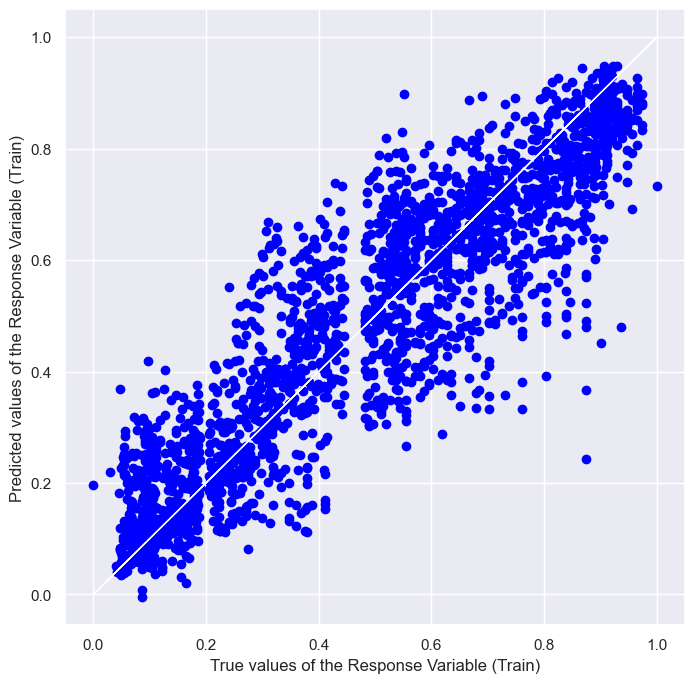

In [8]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(X_train)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(8, 8))
axes.scatter(y_train, y_train_pred, color = "blue")
axes.plot(y_train, y_train, 'w-', linewidth = 1)
axes.set_xlabel("True values of the Response Variable (Train)")
axes.set_ylabel("Predicted values of the Response Variable (Train)")
plt.show()

In [9]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print('K-fold Cross validation score:',cross_val_score(linreg, X_train, y_train, cv=5).mean())
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8252717535684102
Mean Squared Error (MSE) 	: 0.013421869731714295
K-fold Cross validation score: 0.8199291996833041



# Polynomial Regression

We will try polynomial regression with degrees from 1 to 5 and see if that better fits our data

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
maxscore=0
bestDegree=0

for i in range(1,5):

    poly_reg=PolynomialFeatures(degree=i)
    X_train_poly=poly_reg.fit_transform(X_train)

    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly,y_train)
    print("Polynomial degree is:",i)
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    print()

    KfoldScore=cross_val_score(poly_reg, X_train_poly, y_train, cv=5).mean()
    print('K-fold Cross validation score:',KfoldScore)
    print()
    if KfoldScore > maxscore:
        maxscore=KfoldScore
        bestDegree=i

print("The most optimum degree is",bestDegree,"with a score of",maxscore)



# Regression model 3

In [ ]:

numplot = len(lifeEx.columns[1:])
numrows = (numplot+3)//4
f, axes = plt.subplots(nrows= numrows, ncols = 4, figsize = (16,4))
count = 0
for i, column in enumerate(lifeEx.columns[1:]):
    #plt.subplots(4, 4)
    row = i/4
    col = 1 % 4
    plt.scatter(lifeEx['LIFE_EXPECTANCY'], lifeEx[i], ax = axes[row][col] )
    plt.ylabel('Life expectancy', size = 15, ax = axes[row][col] )
    plt.xlabel(i, size = 15, ax = axes[row][col] )
    plt.show()


In [ ]:
plt.figure(figsize=(20,20),dpi=100)

for index, var in enumerate(lifeEx.columns[1:]):
    plt.subplot(4,5, index+1)
    plt.scatter(lifeEx[var],lifeEx['LIFE_EXPECTANCY'])
    plt.ylabel('Life expectancy',size=15)
    plt.xlabel(var,size=12)

In [ ]:
predictors = pd.DataFrame(lifeEx[["SCHOOLING", "LIFE_EXPECTANCY"]])
predictors

In [ ]:
predictors.corr()

In [ ]:
schooling = pd.DataFrame(lifeEx["SCHOOLING"])
lifeExpectancy = pd.DataFrame(lifeEx["LIFE_EXPECTANCY"])

In [ ]:
2938*0.2

In [ ]:
2938-588

In [ ]:
#Train Set : 2350 samples
schoolingTrain = pd.DataFrame(schooling[-2350:])
lifeExTrain = pd.DataFrame(lifeExpectancy[-2350:])

# Test Set: 588 Samples
schoolingTest = pd.DataFrame(schooling[:588])
lifeExTest = pd.DataFrame(lifeExpectancy[:588]) 

print("Train Set :", schoolingTrain.shape, lifeExTrain.shape)
print("Test Set :", schoolingTest.shape, lifeExTest.shape)

In [ ]:
schoolingTrain.info

In [ ]:
schoolingTrain.describe()

In [ ]:
lifeExTrain.describe()

In [ ]:
f,axes = plt.subplots(2, 3, figsize = (24,12))

# Plot the basic uni-varitae figures for garageArea Train data
sb.boxplot (data = schoolingTrain, orient = 'h', ax = axes[0,0])
sb.histplot (data = schoolingTrain, ax = axes [0,1])
sb.violinplot (data = schoolingTrain, orient = 'h', ax = axes [0,2])

# Plot the basic uni-variate figures for salePrice Train Data
sb.boxplot (data = lifeExTrain, orient = 'h', ax = axes[1,0])
sb.histplot (data = lifeExTrain, ax = axes[1,1])
sb.violinplot (data = lifeExTrain, orient = 'h',ax = axes[1,2])

In [ ]:
trainDF = pd.concat([schoolingTrain, lifeExTrain], axis = 1)
trainDF

In [ ]:
trainDF.corr()

In [ ]:
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, robust = True, annot = True, fmt = ".5f", square = False)
#sb.heatmap(trainDF.corr(), annot = True, fmt = ".5f", linecolor = 'red')

In [ ]:
sb.pairplot(data = trainDF)

In [ ]:
sb.jointplot(data=trainDF, x = 'SCHOOLING', y = 'LIFE_EXPECTANCY', height=10)

In [ ]:
##Linear Regression

In [ ]:
linreg=LinearRegression()
linreg.fit(schoolingTrain, lifeExTrain)

In [ ]:
SOMETHING

In [ ]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficiencts \t: a=', linreg.coef_)


In [ ]:
#Drawing the linear model line
lifeExTrainPred = linreg.predict(schoolingTrain)

In [ ]:
f = plt.figure(figsize=(16, 8))
plt.scatter(schoolingTrain, lifeExTrain)
plt.scatter(schoolingTrain, lifeExTrainPred, color = "g")
plt.show()

## CHECKING GOODNESS OF FIT OF THE MODEL
# Metrics : Explained Variance and Mean Squared Error

In [ ]:
print("Explained Variance (R^2) \t:", linreg.score(schoolingTrain, lifeExTrain))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(schoolingTrain, lifeExTrainPred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))



In [ ]:
lifeExTestPred = linreg.predict(schoolingTest)

# Plot the Predictions
f = plt.figure(figsize=(16, 16))
plt.scatter(schoolingTest, lifeExTest, color = "green")
plt.scatter(schoolingTest, lifeExTestPred, color = "white")
plt.show()

In [ ]:
print("Explained Variance (R^2) \t:",linreg.score(schoolingTest, lifeExTest))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(schoolingTest, lifeExTestPred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

#For now the r^2 aint looking good but I guess can use this to say looking at one variable is not enough to tell the whole picture?


##REGRESSION WITH RANDOM TRAIN TEST DATA SPLIT

In [ ]:

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Schooling, lifeExpectancy, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
#MULTI-VARIATE LINEAR REGRESSION

In [14]:
lifeTransform = pd.read_csv("dataset/life_transform.csv")
print("Data dimensions", lifeTransform.shape)
lifeTransform.head()

Data dimensions (2938, 22)


,Unnamed: 0,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,0,Afghanistan,1,2015.0,0.294686,0.802268,0.606280,-1.540089,-0.653537,0.317298,...,0.616162,0.006410,0.562634,0.171717,0.0,-0.765913,0.695802,1.863475,0.215278,10.1
1,1,Afghanistan,1,2014.0,0.187396,0.813152,0.611111,-1.540089,-0.641558,0.293245,...,0.621212,0.127778,0.567017,0.156566,0.0,-0.745047,-0.642920,1.881842,0.211111,10.0
2,2,Afghanistan,1,2013.0,0.187396,0.809070,0.615942,-1.540089,-0.643161,0.309280,...,0.626263,0.150000,0.556038,0.166667,0.0,-0.731598,0.674292,1.896363,0.202778,9.9
3,3,Afghanistan,1,2012.0,0.180763,0.814512,0.623188,-1.540089,-0.617785,0.333333,...,0.632997,0.177778,0.639925,0.181818,0.0,-0.705787,-0.011252,1.914304,0.193056,9.8
4,4,Afghanistan,1,2011.0,0.175788,0.818594,0.628019,-1.540089,-1.506529,0.340278,...,0.639731,0.183333,0.497836,0.186869,0.0,-1.725140,-0.073218,1.932018,0.180556,9.5


In [15]:
Response = pd.DataFrame(lifeTransform["LIFE_EXPECTANCY"])
Response.head(n=10)

,LIFE_EXPECTANCY
0,0.294686
1,0.187396
2,0.187396
3,0.180763
4,0.175788
5,0.169154
6,0.165837
7,0.157546
8,0.147595
9,0.144279


#Doing some logistic regression to see the relation of a developing country and their .. 
# maybe I also do the multi output regression haha idk which param yet but we'll see



#Logistics Regression


<AxesSubplot:xlabel='LIFE_EXPECTANCY', ylabel='LIFE_EXPECTANCY'>

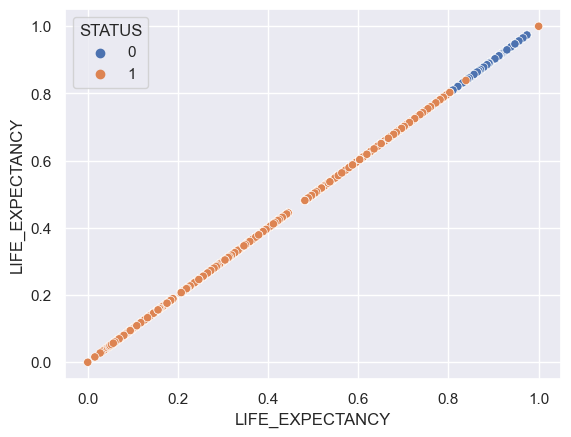

In [19]:
sb.scatterplot(x= lifeTransform["LIFE_EXPECTANCY"], y= lifeTransform["LIFE_EXPECTANCY"] , hue= lifeTransform["STATUS"])

<AxesSubplot:xlabel='LIFE_EXPECTANCY', ylabel='LIFE_EXPECTANCY'>

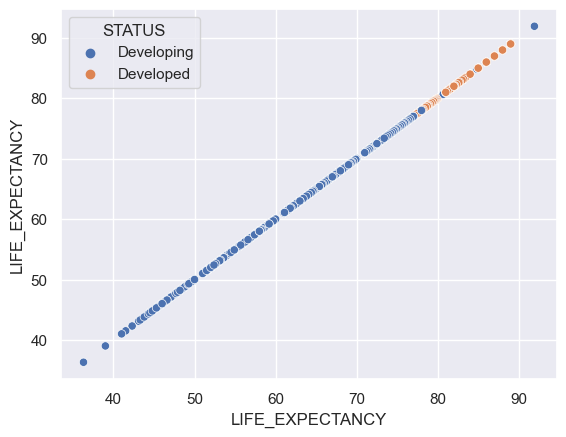

In [20]:
life_filled=pd.read_csv("dataset/life_filled.csv")
sb.scatterplot(x= life_filled["LIFE_EXPECTANCY"], y= life_filled["LIFE_EXPECTANCY"] , hue=life_filled["STATUS"])

As can see here, Developed countries seem to have a greater life expectancy, hence we will use logistics regression to understand 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


In [ ]:
LogsRegDF = pd.read_csv("dataset/life_transform.csv")
print("Data dimensions", LogsRegDF.shape)
LogsRegDF.head()

In [ ]:
# dont think its necessary but maybe put the violin histo and boxplot

In [ ]:
logsRegPred = pd.DataFrame(LogsRegDF[["SCHOOLING", "STATUS"]])
logsRegPred.head(n = 1000)

In [ ]:
logsRegPred.shape


In [ ]:
Schooling = pd.DataFrame(LogsRegDF["SCHOOLING"])
CountryStatus = pd.DataFrame(LogsRegDF["STATUS"])


In [ ]:
CountryStatus = pd.get_dummies(CountryStatus, drop_first = True)
#CountryStatus['STATUS'] = 1 - CountryStatus['STATUS']
CountryStatus.sample(10)
#df_dummies['A_1'] = 1 - df_dummies['A_1']

# 1 Means Country is Considered As Developed
# 2 Means Country is Considered As Developing

In [ ]:
CountryStatus.dtypes

In [ ]:
#colors = ['red' if CountryStatus == 1 else 'yellow']
plt.scatter(Schooling, CountryStatus,  cmap='Rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

In [ ]:
SchoolingTrain, SchoolingTest, CountryStatusTrain, CountryStatusTest = train_test_split(Schooling, CountryStatus, test_size = 0.25)

In [ ]:
LogReg = LogisticRegression()

In [ ]:
LogReg.fit(SchoolingTrain, CountryStatusTrain)